# COMPONENT TWO

Import important library

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [3]:
# Define class names
class_names = ['non_emergency', 'emergency']

In [6]:
# Load Dataset from Dataset path
dataset_dir = "./Emergency_Vehicles"
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
train_csv = os.path.join(dataset_dir, 'train.csv')
test_csv = os.path.join(dataset_dir, 'test.csv')

In [8]:
# Image dimensions (resize image)
image_size = (128, 128)

In [10]:
# Load train.csv
data = pd.read_csv(train_csv)
print ('Sample data:')
print (data.head())

Sample data:
  image_names  emergency_or_not
0    1503.jpg                 0
1    1420.jpg                 0
2    1764.jpg                 0
3    1356.jpg                 0
4    1117.jpg                 0


In [12]:
# Load and preprocess images

def load_images_and_labels(data, img_dir, img_size):
    """
    Load images and labels from the directory using the csv file.
    Args:
    - data: Dataframe containing image names and labels.
    -img_dir: Directory where images are stored.
    -img_size: Tuple specifying image size (height, width) for resizing.

    Return:
    - images: Numpy array of preprocessed images.
    - labels: Numpy array of corresponding labels.
    """
    images = []
    labels = []

    for _, row in data.iterrows():
        img_name = row['image_names']
        label = row ['emergency_or_not']

        # Full path to the images
        img_path = os.path.join(img_dir, img_name)

        # To Resize the images
        img = load_img(img_path, target_size = img_size)

         # Normarlise the pixel values
        img_array = img_to_array(img)/255.0
        images.append (img_array)
        labels.append (label)

    return np.array(images), np.array(labels)

# load images and labels
x, y = load_images_and_labels(data, train_dir, image_size)

# split int training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

# Check dataset shape
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print (f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (1316, 128, 128, 3), y_train shape: (1316,)
x_test shape: (330, 128, 128, 3), y_test shape: (330,)


In [14]:
# Verify class names is properly mapped

print ('Class names:', class_names)
print('Unique values in y_train:', np.unique(y_train))

Class names: ['non_emergency', 'emergency']
Unique values in y_train: [0 1]


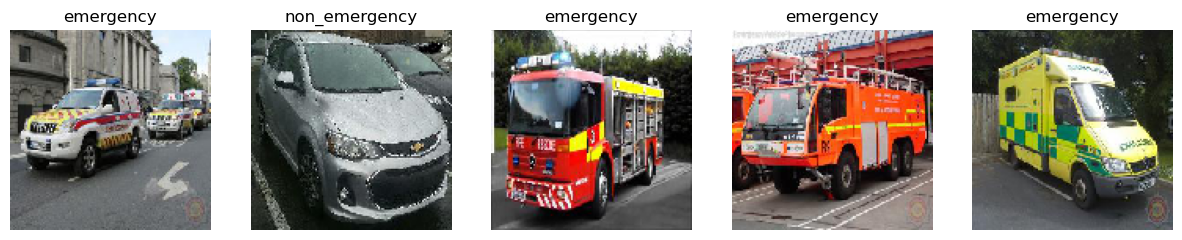

In [16]:
# Visualise using matplotlib to plot/ show the first five images in training set. looping through using imshow() command
fig, axes = plt.subplots(1, 5, figsize = (15, 15))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(class_names[y_train[i]])
    axes[i].axis('off')
  
plt.show()

In [18]:
# Define the image transformation that will be used for the data augmentation.
# Create instance of the ImageDataGenerator class to define these transformation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (
    rotation_range=20, # Randomly rotate images up to 10 degrees
    width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
    height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
    horizontal_flip=True, # Randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
    shear_range=0.10, # crops part of the image
    zoom_range=0.10 # #zooms the image by 10%
)

In [20]:
# Fit the transformation to the normalize images from the training dataset
train_datagen.fit(x_train)

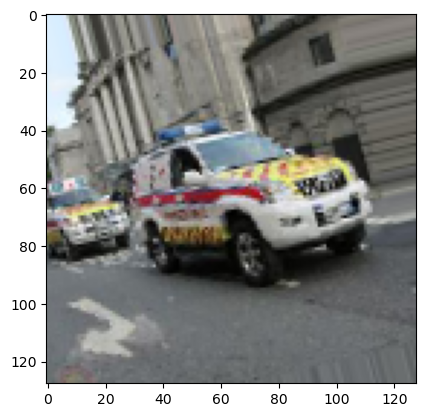

In [28]:
# Make an imjage of a random transformatioin of the first image in the training dataset.
# Using the random_transform() function and plot the image using the imshow() function.
#'for my learning' If it doesn't show, run again from the beginning.
plt.imshow(train_datagen.random_transform(x_train[0]))

In [30]:
# Build CNN model by using the sequential() model from the keras libary to build a CNN.
#Import the following classes from the tenor flow library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 


In [32]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [34]:
# Add layers to this model using the add function. To add the first convolutional layer, it can be done;

#First layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Second layer
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(128,128,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Third layer
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(128,128,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 64 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.optimizers import SGD

In [40]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 32

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=32),epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.5665 - loss: 0.6850 - val_accuracy: 0.5758 - val_loss: 0.6729
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.6365 - loss: 0.6533 - val_accuracy: 0.7121 - val_loss: 0.5899
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.6892 - loss: 0.6073 - val_accuracy: 0.7091 - val_loss: 0.5775
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.7005 - loss: 0.5721 - val_accuracy: 0.7788 - val_loss: 0.4924
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.7125 - loss: 0.5585 - val_accuracy: 0.7545 - val_loss: 0.4921
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.7361 - loss: 0.5429 - val_accuracy: 0.7909 - val_loss: 0.4624
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.7661 - loss: 0.5172 - val_accuracy: 0.7939 - val_loss: 0.4450
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.7652 - loss: 0.5037 - val_accuracy: 0.7788 - val_

In [44]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

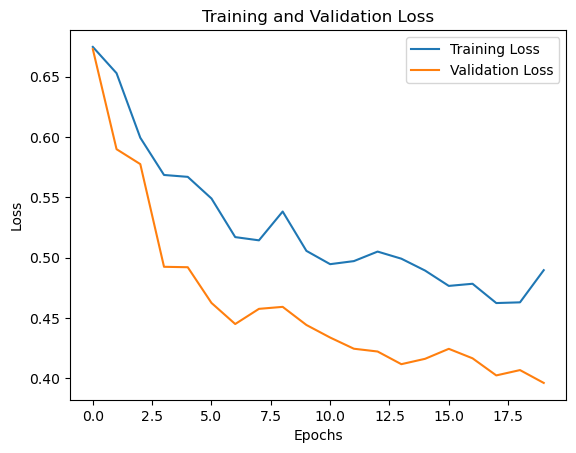

In [46]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

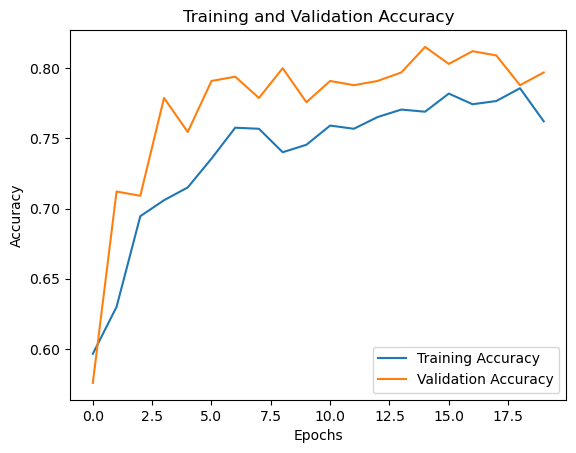

In [48]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [52]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       190
           1       0.83      0.65      0.73       140

    accuracy                           0.80       330
   macro avg       0.81      0.78      0.78       330
weighted avg       0.80      0.80      0.79       330



In [106]:
# Check class distribution in predictions
#print("Unique predictions:", np.unique(y_pred))


<Figure size 2000x3000 with 0 Axes>

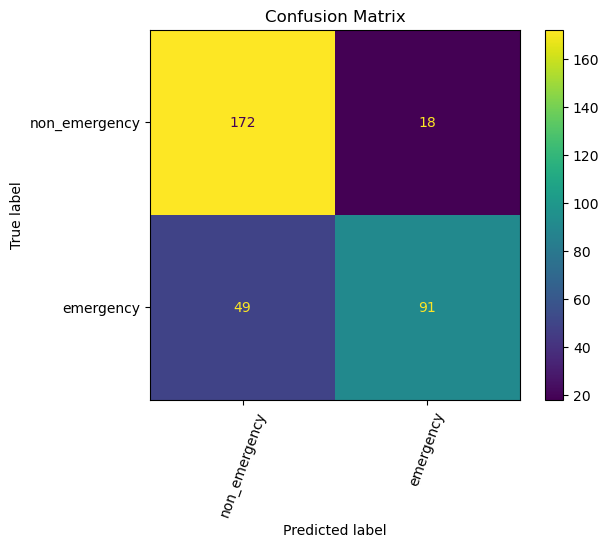

In [54]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

### Create a new model with same cnn architecture, with batch size 128.

In [56]:
# Build CNN model by using the sequential() model from the keras libary to build a CNN.
#Import the following classes from the tenor flow library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 

In [58]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [60]:
# Add layers to this model using the add function. To add the first convolutional layer, it can be done;

#First layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Second layer
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(128,128,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Third layer
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(128,128,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 128

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=128),epochs=20, validation_data=(x_test, y_test))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 643ms/step - accuracy: 0.5356 - loss: 0.6871 - val_accuracy: 0.5758 - val_loss: 0.6961
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 630ms/step - accuracy: 0.5680 - loss: 0.6873 - val_accuracy: 0.5818 - val_loss: 0.6635
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 649ms/step - accuracy: 0.5875 - loss: 0.6685 - val_accuracy: 0.5939 - val_loss: 0.6570
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 626ms/step - accuracy: 0.6345 - loss: 0.6536 - val_accuracy: 0.6636 - val_loss: 0.6356
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 636ms/step - accuracy: 0.6556 - loss: 0.6388 - val_accuracy: 0.6758 - val_loss: 0.6105
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 637ms/step - accuracy: 0.6938 - loss: 0.6042 - val_accuracy: 0.6970 - val_loss: 0.5822
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 651ms/step - accuracy: 0.6975 - loss: 0.6034 - val_accuracy: 0.7061 - val_loss: 0.5871
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 701ms/step - accuracy: 0.6653 - loss: 0.6130 - val_accuracy: 0.

In [68]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

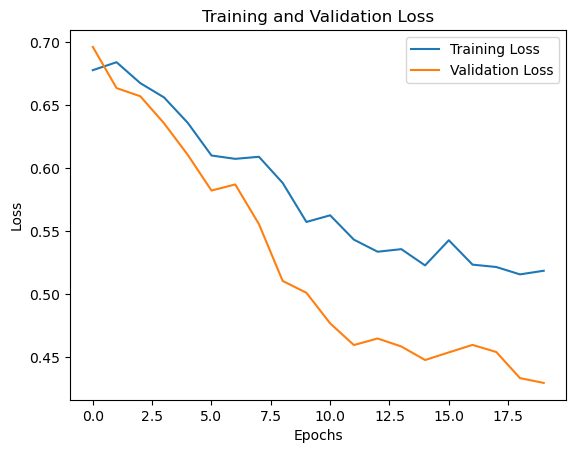

In [70]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

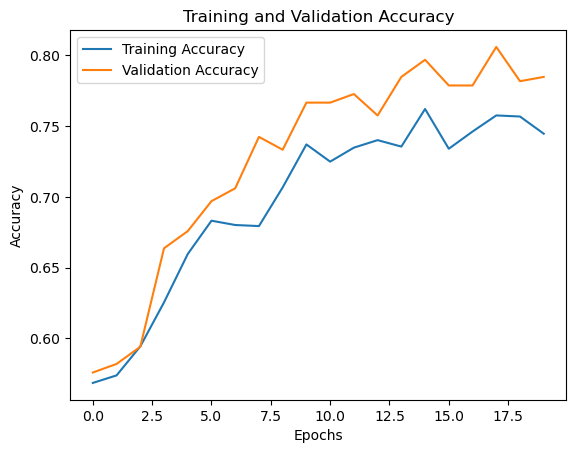

In [72]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [82]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       190
           1       0.75      0.74      0.74       140

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330



<Figure size 2000x3000 with 0 Axes>

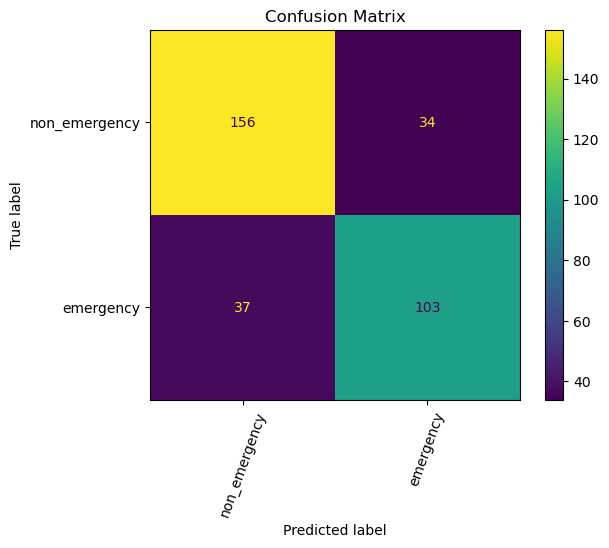

In [84]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

### Adding stride and padding

When creating the convolutional layers with Conv2D(), if no stride length is specified it uses a default stride of 1. i will repeat this model but with a stride length of 2 in all three convolutional layers, for both the horizontal and vertical directions. And also add padding in each convolutional layer 

In [86]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [88]:
# creating model with stride length of 2 in all three convolutional layers

# first layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape=(128,128,3), strides = (2, 2), padding = "same",activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape=(128,128,3), strides = (2, 2), padding = "same",activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), input_shape=(128,128,3), strides = (2, 2), padding = "same",activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))


# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,041 (621.25 KB)

 Trainable params: 159,041 (621.25 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 128

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=128),epochs=20, validation_data=(x_test, y_test))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.4874 - loss: 0.6980 - val_accuracy: 0.5758 - val_loss: 0.6802
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.6038 - loss: 0.6771 - val_accuracy: 0.5758 - val_loss: 0.6778
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.6018 - loss: 0.6714 - val_accuracy: 0.5758 - val_loss: 0.6766
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.5864 - loss: 0.6766 - val_accuracy: 0.5758 - val_loss: 0.6756
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.5859 - loss: 0.6732 - val_accuracy: 0.5758 - val_loss: 0.6748
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.5929 - loss: 0.6682 - val_accuracy: 0.5758 - val_loss: 0.6716
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.5960 - loss: 0.6692 - val_accuracy: 0.5758 - val_loss: 0.6687
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.5938 - loss: 0.6684 - val_accuracy: 0.

In [96]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

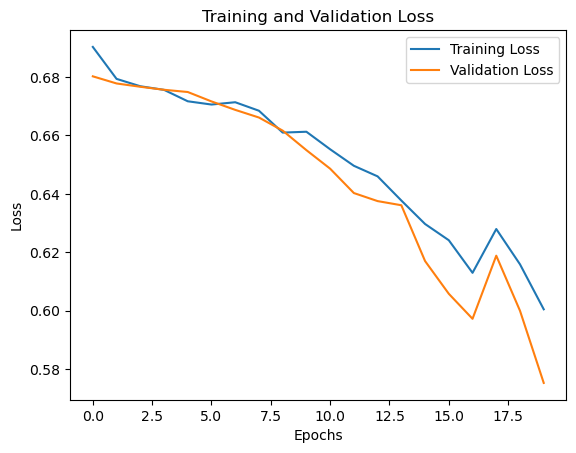

In [98]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

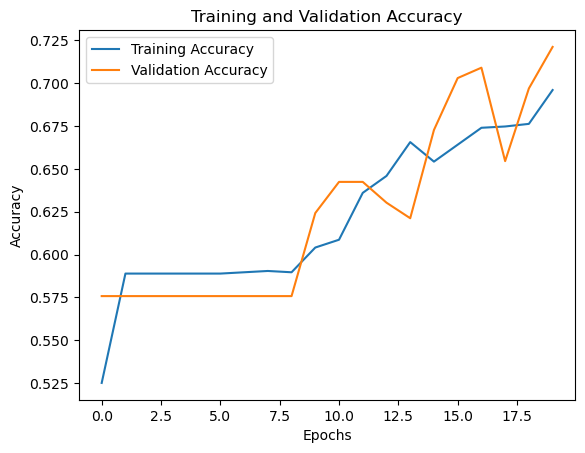

In [100]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [102]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [104]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77       190
           1       0.71      0.58      0.64       140

    accuracy                           0.72       330
   macro avg       0.72      0.70      0.71       330
weighted avg       0.72      0.72      0.72       330



<Figure size 2000x3000 with 0 Axes>

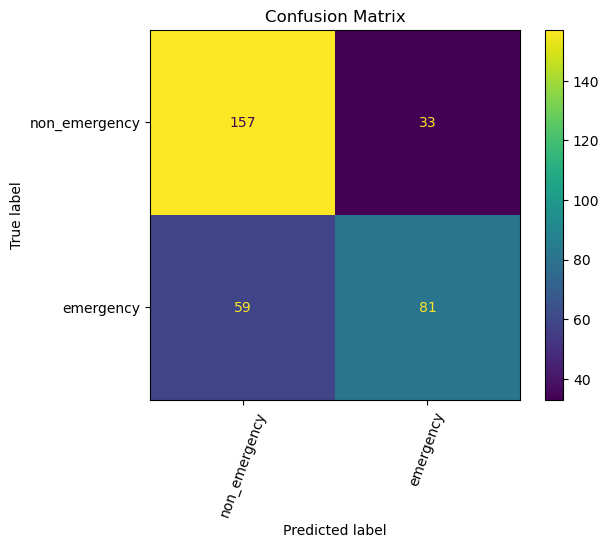

In [106]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

## Using convolutional layers that use a kernel size of 5x5

In [108]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [110]:
# Add layers to this model using the add function. To add the first convolutional layer, it can be done;


# first layer
model.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2)))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2)))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2)))


# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,618,177 (9.99 MB)

 Trainable params: 2,618,177 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 32

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=32),epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 301ms/step - accuracy: 0.5781 - loss: 0.6801 - val_accuracy: 0.6758 - val_loss: 0.6586
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 301ms/step - accuracy: 0.5998 - loss: 0.6616 - val_accuracy: 0.5758 - val_loss: 0.6776
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - accuracy: 0.5933 - loss: 0.6742 - val_accuracy: 0.6939 - val_loss: 0.6266
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 299ms/step - accuracy: 0.6630 - loss: 0.6312 - val_accuracy: 0.7758 - val_loss: 0.5251
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 298ms/step - accuracy: 0.7008 - loss: 0.5901 - val_accuracy: 0.7212 - val_loss: 0.5342
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 298ms/step - accuracy: 0.7243 - loss: 0.6063 - val_accuracy: 0.7939 - val_loss: 0.4714
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 300ms/step - accuracy: 0.7327 - loss: 0.5638 - val_accuracy: 0.7788 - val_loss: 0.4556
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 307ms/step - accuracy: 0.7514 - loss: 0.5287 - val_accuracy: 0.793

In [118]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

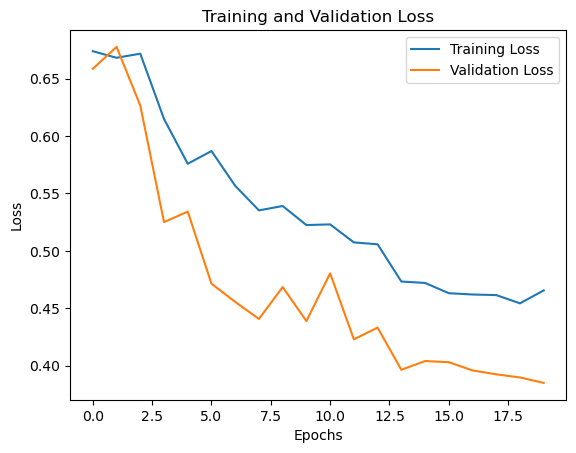

In [120]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

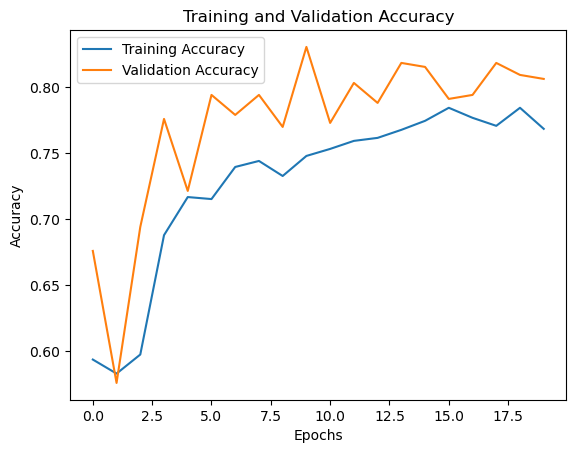

In [122]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [124]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


In [126]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       190
           1       0.88      0.63      0.73       140

    accuracy                           0.81       330
   macro avg       0.83      0.78      0.79       330
weighted avg       0.82      0.81      0.80       330



<Figure size 2000x3000 with 0 Axes>

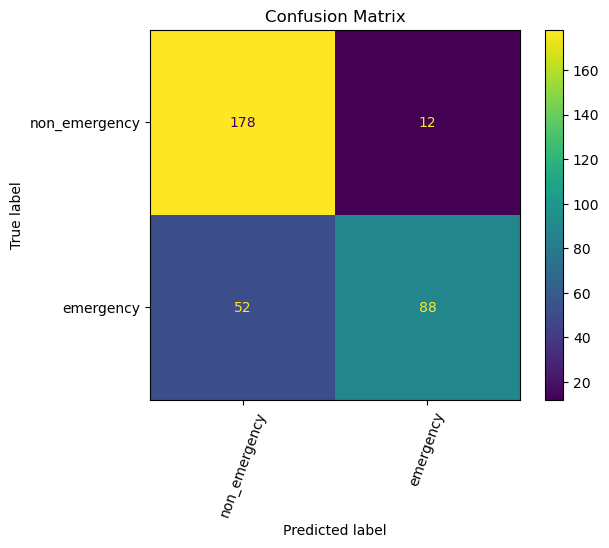

In [128]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

## Using convolutional layers that use a kernel size of 5x5 with a batch size of 128

In [130]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [132]:
# Add layers to this model using the add function.


# first layer
model.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2)))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2)))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2)))

# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 25, 25, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,618,177 (9.99 MB)

 Trainable params: 2,618,177 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [138]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 128

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=128),epochs=20, validation_data=(x_test, y_test))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5687 - loss: 0.6874 - val_accuracy: 0.5758 - val_loss: 0.6830
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5957 - loss: 0.6706 - val_accuracy: 0.5758 - val_loss: 0.6603
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6050 - loss: 0.6567 - val_accuracy: 0.6545 - val_loss: 0.6293
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6282 - loss: 0.6386 - val_accuracy: 0.7000 - val_loss: 0.6027
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6644 - loss: 0.6242 - val_accuracy: 0.7242 - val_loss: 0.5619
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6882 - loss: 0.6021 - val_accuracy: 0.7364 - val_loss: 0.5462
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7225 - loss: 0.5772 - val_accuracy: 0.7697 - val_loss: 0.5190
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7064 - loss: 0.5841 - val_accuracy: 0.7606 - val_loss:

In [140]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

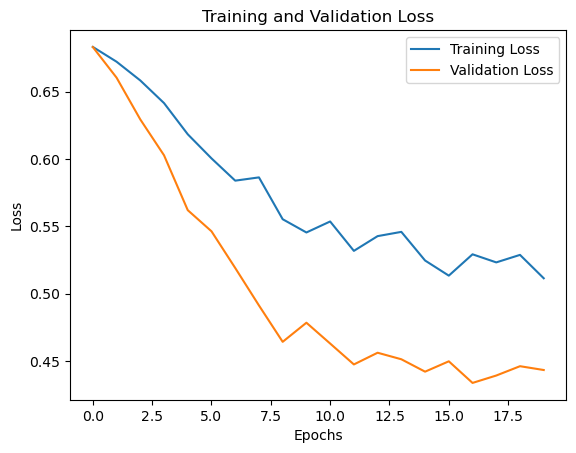

In [142]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

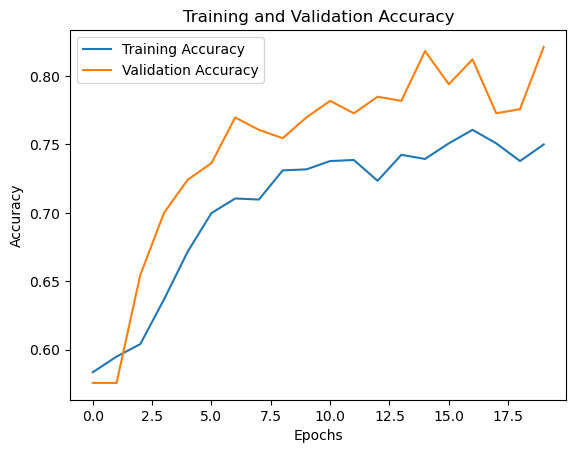

In [144]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [146]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


In [148]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       190
           1       0.74      0.90      0.81       140

    accuracy                           0.82       330
   macro avg       0.82      0.83      0.82       330
weighted avg       0.84      0.82      0.82       330



<Figure size 2000x3000 with 0 Axes>

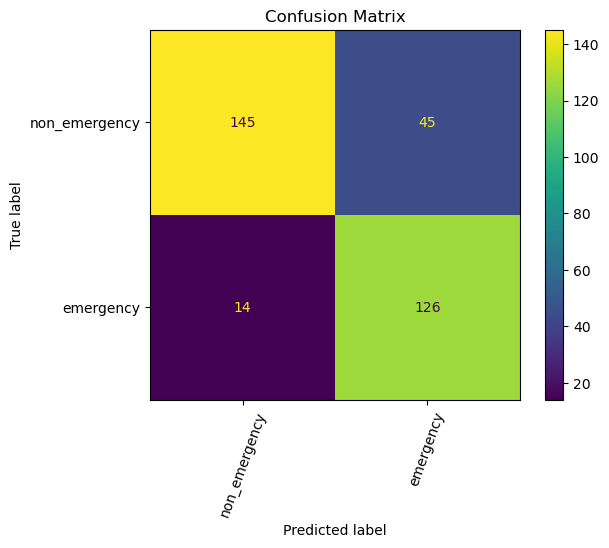

In [150]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

## Convolutional layers that use a kernel size of 5x5 with a batch size of 128, with stride and padding

In [152]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [154]:
# creating model with stride length of 2 in all three convolutional layers

# first layer
model.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape=(128,128,3), strides = (2, 2), padding = "same",activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (5, 5), input_shape=(128,128,3), strides = (2, 2), padding = "same",activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (5, 5), input_shape=(128,128,3), strides = (2, 2), padding = "same",activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))


# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [156]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 324,417 (1.24 MB)

 Trainable params: 324,417 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [158]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [160]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 128

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=128),epochs=20, validation_data=(x_test, y_test))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.5899 - loss: 0.6804 - val_accuracy: 0.5758 - val_loss: 0.6850
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.6024 - loss: 0.6662 - val_accuracy: 0.5758 - val_loss: 0.6766
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step - accuracy: 0.6216 - loss: 0.6686 - val_accuracy: 0.5758 - val_loss: 0.6728
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 268ms/step - accuracy: 0.6180 - loss: 0.6556 - val_accuracy: 0.5788 - val_loss: 0.6653
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - accuracy: 0.6160 - loss: 0.6583 - val_accuracy: 0.6121 - val_loss: 0.6550
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.6276 - loss: 0.6483 - val_accuracy: 0.6364 - val_loss: 0.6535
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.6377 - loss: 0.6485 - val_accuracy: 0.6545 - val_loss: 0.6304
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 0.6363 - loss: 0.6444 - val_accuracy: 0.

In [162]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

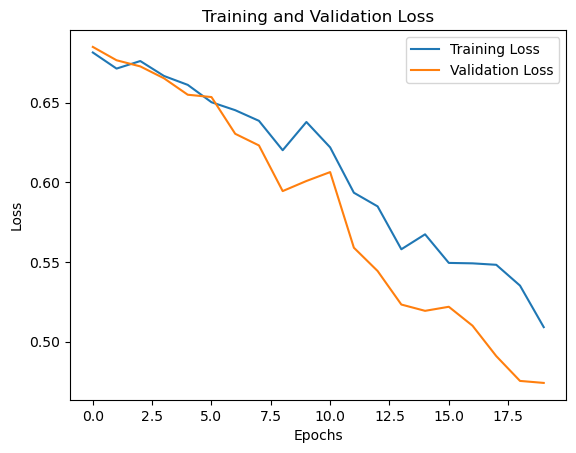

In [164]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

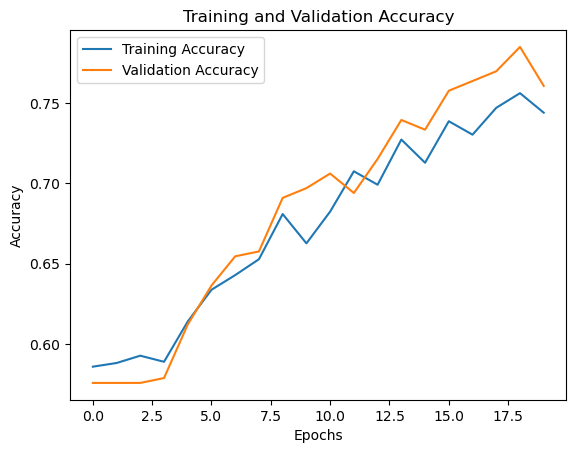

In [166]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [168]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [170]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       190
           1       0.71      0.74      0.72       140

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



<Figure size 2000x3000 with 0 Axes>

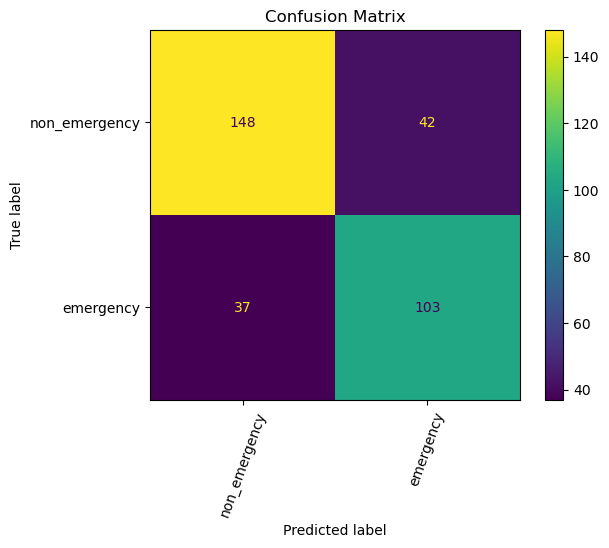

In [172]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

### A new model that uses the Average Pooling method in each pooling layer

In [174]:
# import neccessary libary

from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout

In [176]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [178]:
# creating model 

# first layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(AveragePooling2D(pool_size = (2, 2)))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(AveragePooling2D(pool_size = (2, 2)))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(AveragePooling2D(pool_size = (2, 2)))

# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [180]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 63, 63, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 30, 30, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [182]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [184]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 32

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=32),epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.5809 - loss: 0.6769 - val_accuracy: 0.5788 - val_loss: 0.6660
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.5898 - loss: 0.6621 - val_accuracy: 0.6424 - val_loss: 0.6367
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.6531 - loss: 0.6444 - val_accuracy: 0.6515 - val_loss: 0.6239
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.6057 - loss: 0.6613 - val_accuracy: 0.6545 - val_loss: 0.6369
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.6705 - loss: 0.6186 - val_accuracy: 0.6879 - val_loss: 0.5919
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.6722 - loss: 0.6241 - val_accuracy: 0.7000 - val_loss: 0.5661
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.6993 - loss: 0.5913 - val_accuracy: 0.7152 - val_loss: 0.5592
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.7127 - loss: 0.5920 - val_accuracy: 0.7364 - val_

In [186]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

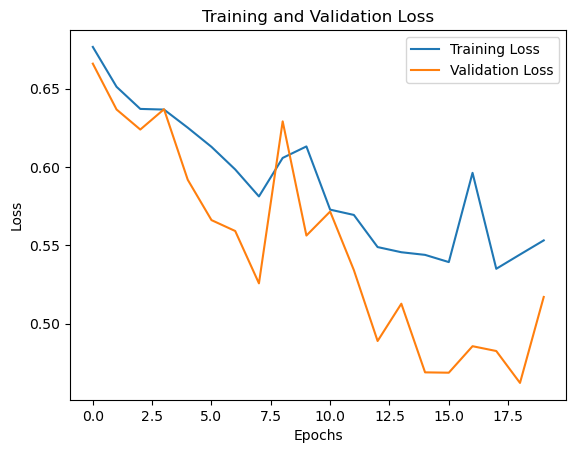

In [188]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

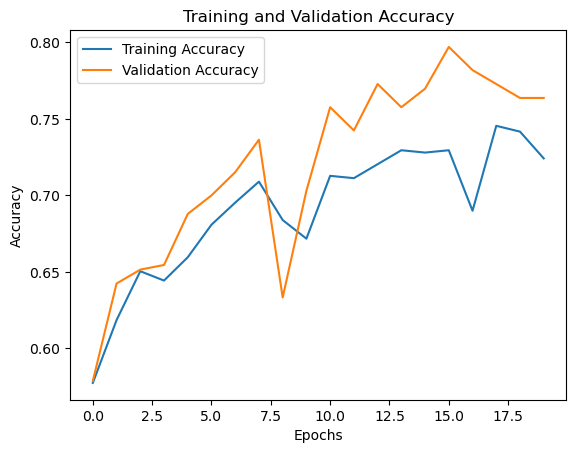

In [190]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [192]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [194]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       190
           1       0.74      0.68      0.71       140

    accuracy                           0.76       330
   macro avg       0.76      0.75      0.75       330
weighted avg       0.76      0.76      0.76       330



<Figure size 2000x3000 with 0 Axes>

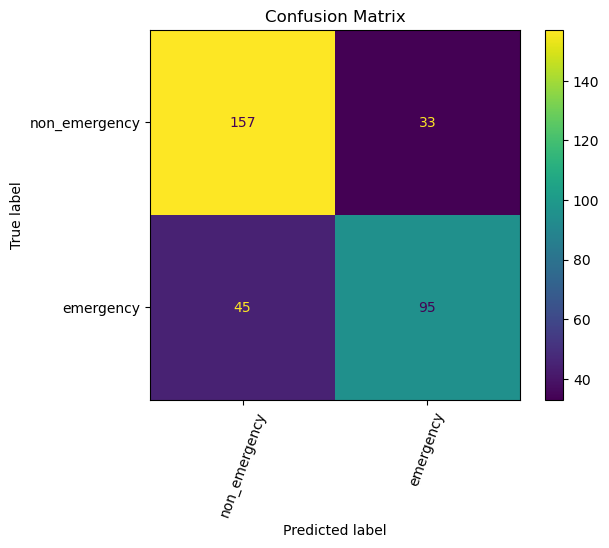

In [196]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

### Add stride and padding using average pooling

In [200]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [202]:
# creating model with stride length of 2 in all three convolutional layers

# first layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape=(128,128,3), strides = (2, 2), padding = "same",activation = 'relu'))
# Adding padding in the pooling layers
model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape=(128,128,3), strides = (2, 2), padding = "same",activation = 'relu'))
# Adding padding in the pooling layers
model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), input_shape=(128,128,3), strides = (2, 2), padding = "same",activation = 'relu'))
# Adding padding in the pooling layers
model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [204]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 32, 32, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 8, 8, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 2, 2, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,041 (621.25 KB)

 Trainable params: 159,041 (621.25 KB)

 Non-trainable params: 0 (0.00 B)

In [206]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [208]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 32

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=32),epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5773 - loss: 0.6863 - val_accuracy: 0.5758 - val_loss: 0.6825
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6153 - loss: 0.6671 - val_accuracy: 0.5758 - val_loss: 0.6813
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6011 - loss: 0.6759 - val_accuracy: 0.5758 - val_loss: 0.6790
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5995 - loss: 0.6702 - val_accuracy: 0.5758 - val_loss: 0.6771
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5860 - loss: 0.6724 - val_accuracy: 0.5758 - val_loss: 0.6725
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5844 - loss: 0.6722 - val_accuracy: 0.5758 - val_loss: 0.6679
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5965 - loss: 0.6648 - val_accuracy: 0.5818 - val_loss: 0.6648
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6276 - loss: 0.6567 - val_accuracy: 0.6242 - val_loss: 0.

In [210]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

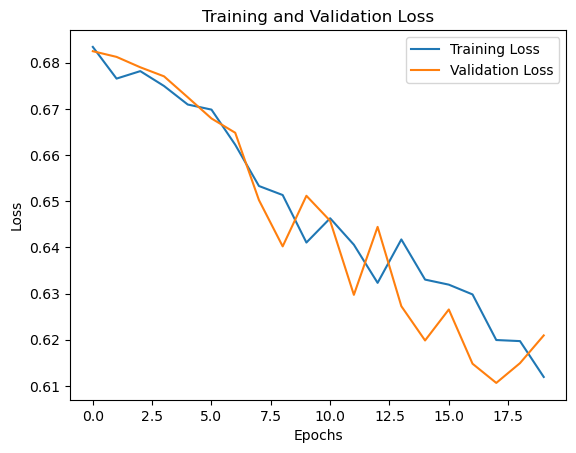

In [212]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

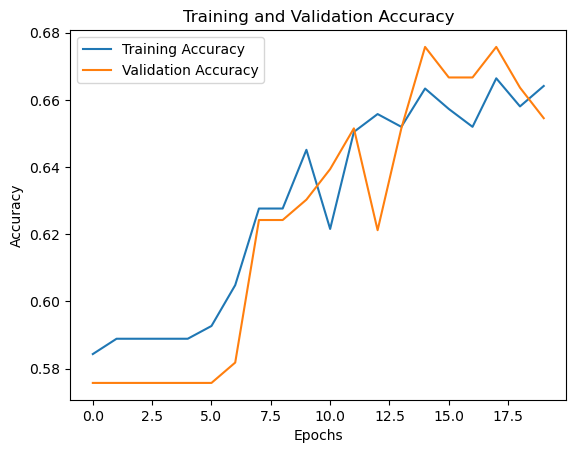

In [214]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [216]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [218]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       190
           1       0.60      0.58      0.59       140

    accuracy                           0.65       330
   macro avg       0.65      0.64      0.65       330
weighted avg       0.65      0.65      0.65       330



<Figure size 2000x3000 with 0 Axes>

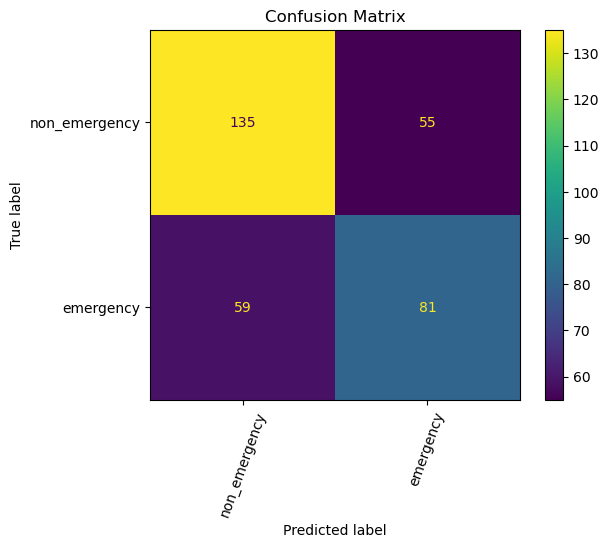

In [220]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

### Convolutional layers that use a kernel size of 5x5 with a batch size of 128 and average pooling method in each layer

In [222]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [224]:
# creating model 

# first layer
model.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(AveragePooling2D(pool_size = (2, 2)))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(AveragePooling2D(pool_size = (2, 2)))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
# Adding padding in the pooling layers
model.add(AveragePooling2D(pool_size = (2, 2)))

# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [226]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 62, 62, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_7             │ (None, 29, 29, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 25, 25, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_8             │ (None, 12, 12, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,618,177 (9.99 MB)

 Trainable params: 2,618,177 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

In [228]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [230]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 128

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=128),epochs=20, validation_data=(x_test, y_test))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5281 - loss: 0.6871 - val_accuracy: 0.5758 - val_loss: 0.6705
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6090 - loss: 0.6636 - val_accuracy: 0.6364 - val_loss: 0.6542
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6353 - loss: 0.6575 - val_accuracy: 0.6485 - val_loss: 0.6282
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6746 - loss: 0.6324 - val_accuracy: 0.6576 - val_loss: 0.6234
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6403 - loss: 0.6408 - val_accuracy: 0.6667 - val_loss: 0.6145
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6593 - loss: 0.6238 - val_accuracy: 0.5970 - val_loss: 0.6425
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6358 - loss: 0.6365 - val_accuracy: 0.6697 - val_loss: 0.6241
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6451 - loss: 0.6287 - val_accuracy: 0.6515 - val_loss:

In [232]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

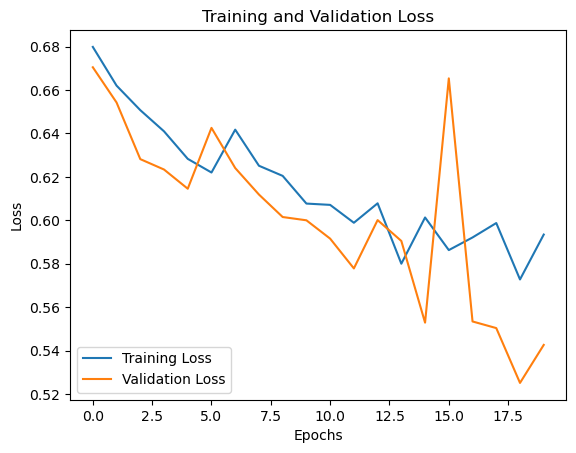

In [234]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

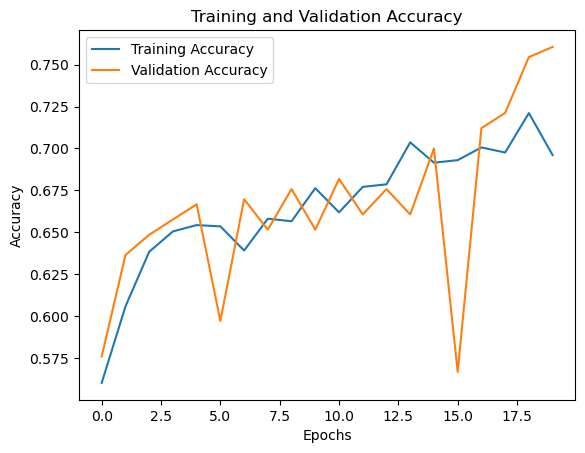

In [236]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [238]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


In [240]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       190
           1       0.72      0.71      0.71       140

    accuracy                           0.76       330
   macro avg       0.76      0.75      0.75       330
weighted avg       0.76      0.76      0.76       330



<Figure size 2000x3000 with 0 Axes>

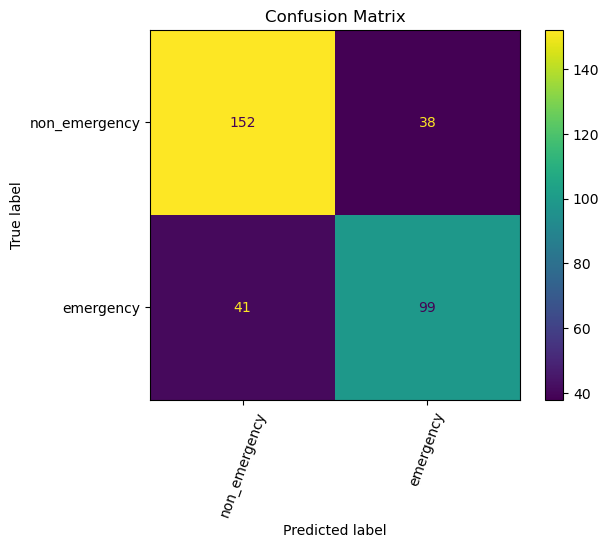

In [242]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

### Regularisation used in the CNN model 

Regularisation in a CNN model, can help prevent overfitting and make the model more generalisable to new data.

Batch Normalisation is the regularisation method adopted which involves normalising the outputs from a layer such that they have a mean of zero and a standard deviation of 1

In [244]:
# import libary
from tensorflow.keras.layers import BatchNormalization

In [246]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [248]:
# creating model 

# first layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape=(128,128,3),activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(momentum =0.9))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape=(128,128,3),activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(momentum =0.9))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), input_shape=(128,128,3),activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(momentum =0.9))

# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [250]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_9             │ (None, 63, 63, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_10            │ (None, 30, 30, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_11            │ (None, 14, 14, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,665 (12.61 MB)

 Trainable params: 3,305,217 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [254]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [256]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 32

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=32),epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - accuracy: 0.5940 - loss: 1.3732 - val_accuracy: 0.6333 - val_loss: 1.7146
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step - accuracy: 0.5435 - loss: 2.6185 - val_accuracy: 0.5879 - val_loss: 1.5956
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - accuracy: 0.5964 - loss: 1.5845 - val_accuracy: 0.6727 - val_loss: 1.1064
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.5860 - loss: 1.3444 - val_accuracy: 0.6667 - val_loss: 0.6809
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.5971 - loss: 0.6911 - val_accuracy: 0.6455 - val_loss: 0.6297
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.6385 - loss: 0.6507 - val_accuracy: 0.6364 - val_loss: 0.6019
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - accuracy: 0.6419 - loss: 0.6206 - val_accuracy: 0.6576 - val_loss: 0.6024
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.6393 - loss: 0.6275 - val_accuracy: 0.6515 - val_

In [258]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

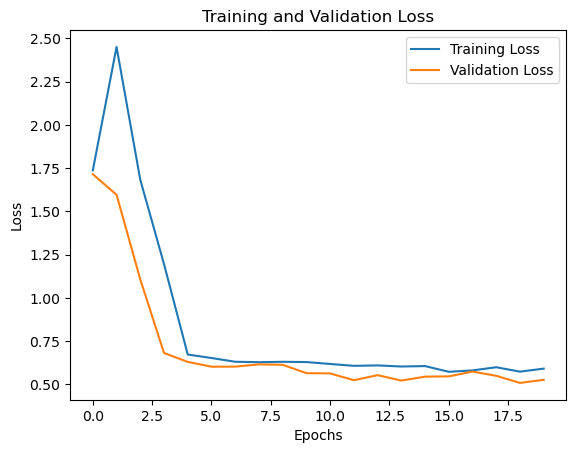

In [260]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

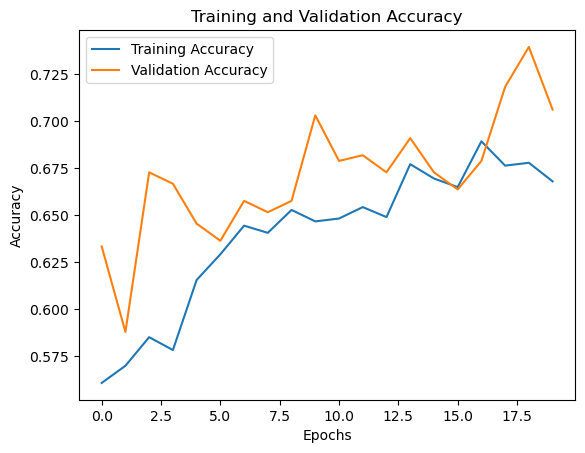

In [262]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [264]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [266]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       190
           1       0.74      0.47      0.58       140

    accuracy                           0.71       330
   macro avg       0.72      0.68      0.68       330
weighted avg       0.71      0.71      0.69       330



<Figure size 2000x3000 with 0 Axes>

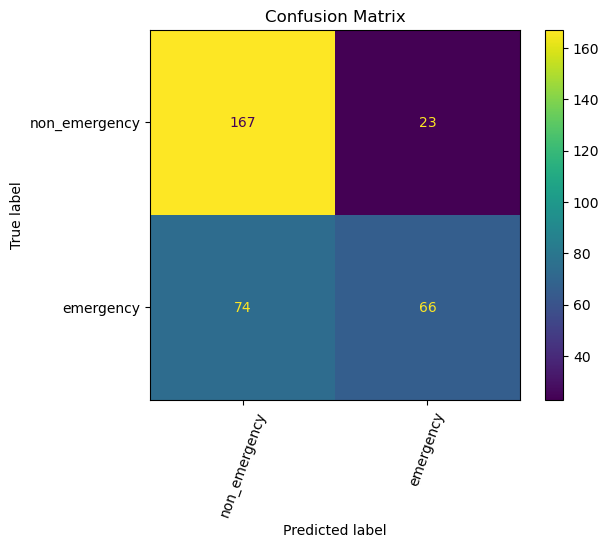

In [268]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

### Regularisation in CNN model using kernel size of 5x5 and average pooling

In [274]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [278]:
# creating model 

# first layer
model.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(momentum =0.9))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(momentum =0.9))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(momentum =0.9))

# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [280]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_12            │ (None, 62, 62, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_13            │ (None, 29, 29, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 25, 25, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_14            │ (None, 12, 12, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,619,073 (9.99 MB)

 Trainable params: 2,618,625 (9.99 MB)

 Non-trainable params: 448 (1.75 KB)

In [282]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [284]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 128

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=128),epochs=20, validation_data=(x_test, y_test))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6184 - loss: 0.8644 - val_accuracy: 0.4455 - val_loss: 0.9171
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6510 - loss: 0.7776 - val_accuracy: 0.6242 - val_loss: 0.8231
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7210 - loss: 0.7006 - val_accuracy: 0.6667 - val_loss: 0.6813
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7090 - loss: 0.6232 - val_accuracy: 0.7576 - val_loss: 0.5348
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7557 - loss: 0.5387 - val_accuracy: 0.7333 - val_loss: 0.5383
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7655 - loss: 0.5109 - val_accuracy: 0.7545 - val_loss: 0.4856
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7652 - loss: 0.4856 - val_accuracy: 0.7667 - val_loss: 0.4492
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7701 - loss: 0.4935 - val_accuracy: 0.6818 - val_loss:

In [286]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

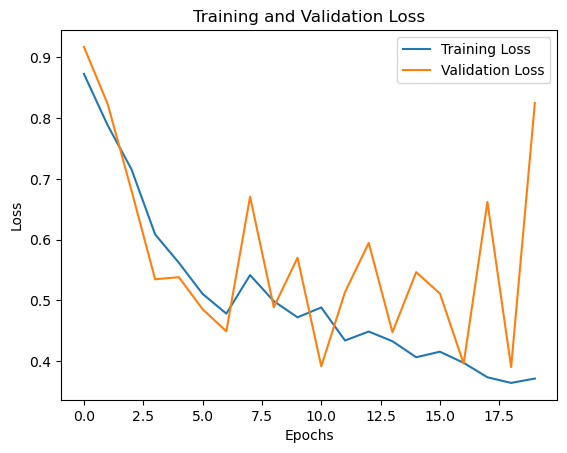

In [288]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

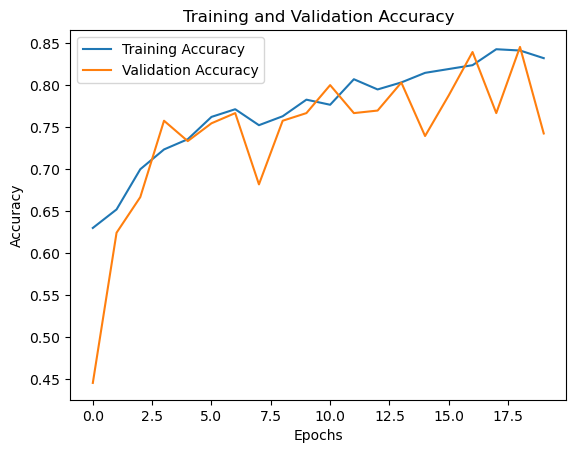

In [290]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [292]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


In [294]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.57      0.72       190
           1       0.63      0.98      0.76       140

    accuracy                           0.74       330
   macro avg       0.80      0.77      0.74       330
weighted avg       0.83      0.74      0.74       330



<Figure size 2000x3000 with 0 Axes>

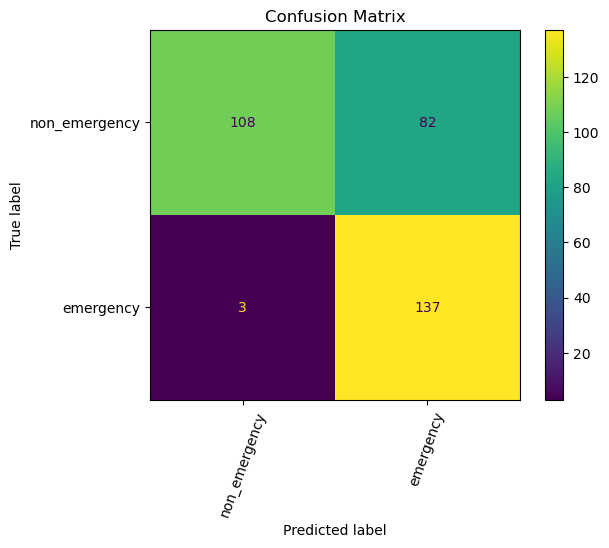

In [296]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

### Regularisation in CNN model max pooling

In [300]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [302]:
# creating model 

# first layer
model.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape=(128,128,3), strides = (2, 2),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(momentum =0.9))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (5, 5), input_shape=(128,128,3), strides = (2, 2),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
model.add(BatchNormalization(momentum =0.9))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (5, 5), input_shape=(128,128,3), strides = (2, 2),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
model.add(BatchNormalization(momentum =0.9))


# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [304]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 62, 62, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 2, 2, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276,161 (1.05 MB)

 Trainable params: 275,713 (1.05 MB)

 Non-trainable params: 448 (1.75 KB)

In [306]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [308]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 32

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=32),epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.5922 - loss: 0.7796 - val_accuracy: 0.6424 - val_loss: 0.7211
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6985 - loss: 0.6000 - val_accuracy: 0.6545 - val_loss: 0.6200
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7077 - loss: 0.5716 - val_accuracy: 0.7030 - val_loss: 0.5606
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7575 - loss: 0.5322 - val_accuracy: 0.4697 - val_loss: 1.2275
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7708 - loss: 0.4968 - val_accuracy: 0.7697 - val_loss: 0.4671
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7816 - loss: 0.4935 - val_accuracy: 0.5970 - val_loss: 0.7577
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7553 - loss: 0.5015 - val_accuracy: 0.5273 - val_loss: 1.2111
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7678 - loss: 0.4840 - val_accuracy: 0.7758 - val_loss: 0.

In [310]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

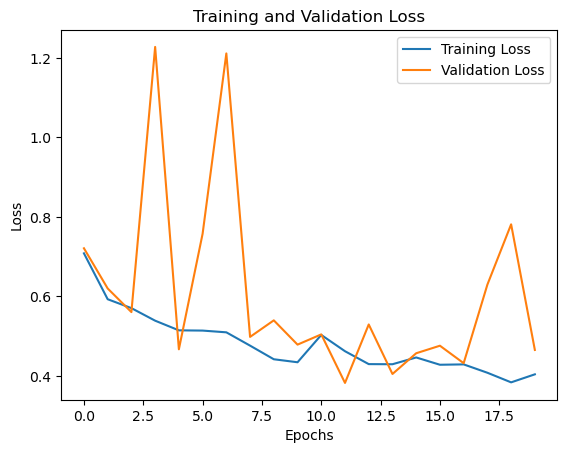

In [312]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

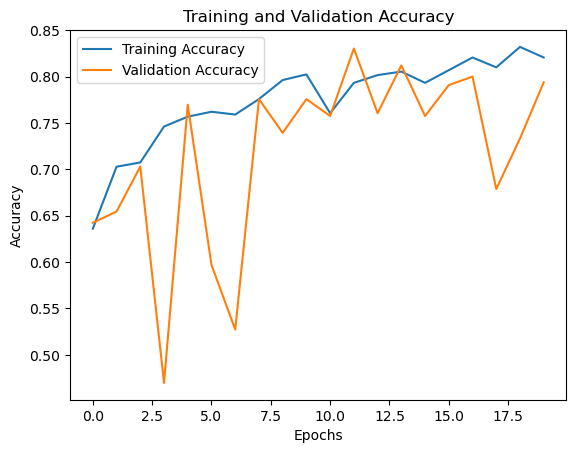

In [314]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [316]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [318]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       190
           1       0.70      0.89      0.79       140

    accuracy                           0.79       330
   macro avg       0.80      0.81      0.79       330
weighted avg       0.82      0.79      0.79       330



<Figure size 2000x3000 with 0 Axes>

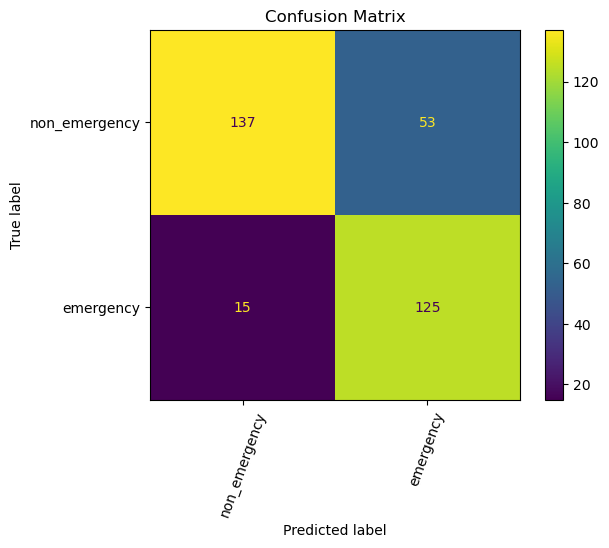

In [320]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

### Training model with a learning rate reduced by a factor of 10, i.e. with a learning rate of 0.001

In [323]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [325]:
# creating model 

# first layer
model.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape=(128,128,3), strides = (2, 2),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(momentum =0.9))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (5, 5), input_shape=(128,128,3), strides = (2, 2),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
model.add(BatchNormalization(momentum =0.9))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (5, 5), input_shape=(128,128,3), strides = (2, 2),activation = 'relu'))
# Adding padding in the pooling layers
model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
model.add(BatchNormalization(momentum =0.9))


# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [327]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 62, 62, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 2, 2, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276,161 (1.05 MB)

 Trainable params: 275,713 (1.05 MB)

 Non-trainable params: 448 (1.75 KB)

In [329]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [331]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 32

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=32),epochs=20, validation_data=(x_test, y_test))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.5315 - loss: 0.8532 - val_accuracy: 0.6727 - val_loss: 0.5842
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.6740 - loss: 0.6299 - val_accuracy: 0.7364 - val_loss: 0.5231
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7096 - loss: 0.6077 - val_accuracy: 0.7242 - val_loss: 0.5234
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7323 - loss: 0.5286 - val_accuracy: 0.7788 - val_loss: 0.4488
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7261 - loss: 0.5394 - val_accuracy: 0.7515 - val_loss: 0.4973
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7746 - loss: 0.5025 - val_accuracy: 0.8061 - val_loss: 0.4324
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.7586 - loss: 0.5169 - val_accuracy: 0.7485 - val_loss: 0.4931
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7442 - loss: 0.5098 - val_accuracy: 0.7909 - v

In [333]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

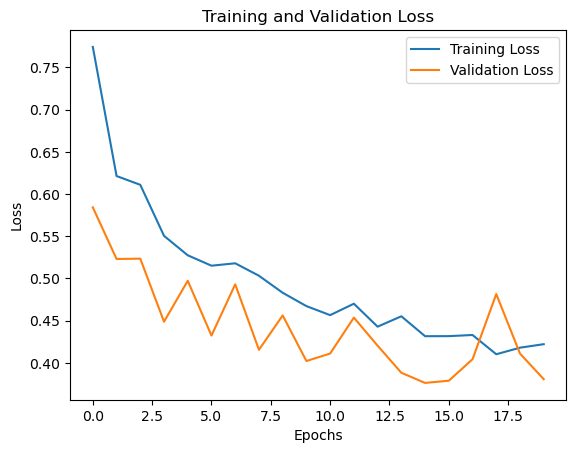

In [335]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

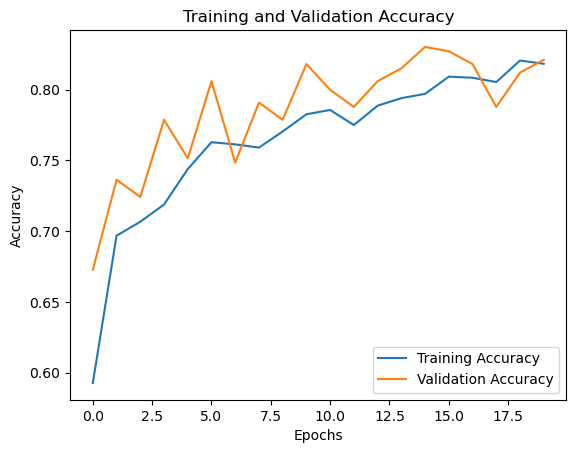

In [337]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [339]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [341]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       190
           1       0.77      0.83      0.80       140

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



<Figure size 2000x3000 with 0 Axes>

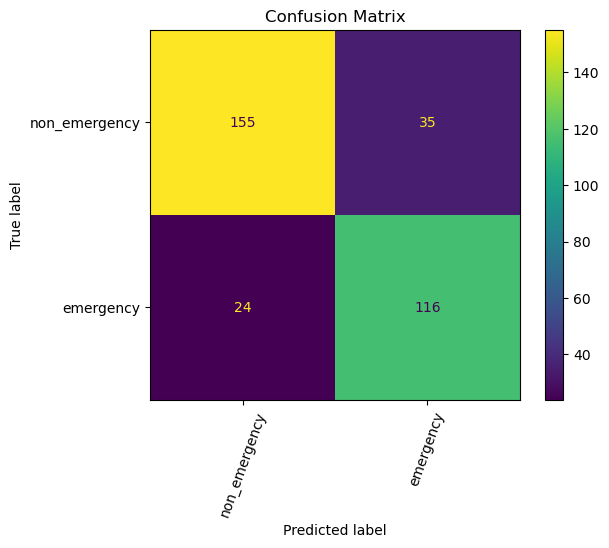

In [343]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()

## Reduced learning rate using average pooling

In [346]:
# create an instance of the Sequential class, which you will used for the model
model = Sequential()

In [348]:
# creating model 

# first layer
model.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(momentum =0.9))

# second layer
model.add(Conv2D(filters = 64, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(momentum =0.9))

# Third layer
model.add(Conv2D(filters = 128, kernel_size = (5, 5), input_shape=(128,128,3),activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(momentum =0.9))

# After the convolutional and pooling layers, then add a Flatten layer;
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation = 'relu'))

# Set a dropout rate of 50% on this layer using the Dropout() class:
model.add(Dropout(0.5))

# Finally, add the output dense layer with a single neuron and the 
# sigmoid function for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [350]:
# print a summary of the final model using the following command
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_15            │ (None, 62, 62, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_16            │ (None, 29, 29, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 25, 25, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_17            │ (None, 12, 12, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,619,073 (9.99 MB)

 Trainable params: 2,618,625 (9.99 MB)

 Non-trainable params: 448 (1.75 KB)

In [352]:
# Compile the CNN model using the Stochastic Gradient Descent (SGD) optimiser
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])

In [354]:
# We are training this model for 20 epochs, using batches of randomly transformed images generated 
# from the training data, with a batch size of 32

history=model.fit(train_datagen.flow(x_train, y_train, batch_size=32),epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 317ms/step - accuracy: 0.6104 - loss: 0.9325 - val_accuracy: 0.7273 - val_loss: 0.5443
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 311ms/step - accuracy: 0.7124 - loss: 0.6915 - val_accuracy: 0.7242 - val_loss: 0.6315
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.6562 - loss: 0.7104 - val_accuracy: 0.7545 - val_loss: 0.5145
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.7231 - loss: 0.5879 - val_accuracy: 0.7667 - val_loss: 0.5114
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.7194 - loss: 0.6595 - val_accuracy: 0.7879 - val_loss: 0.4448
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 314ms/step - accuracy: 0.7370 - loss: 0.5722 - val_accuracy: 0.7667 - val_loss: 0.4834
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 311ms/step - accuracy: 0.7542 - loss: 0.5528 - val_accuracy: 0.8061 - val_loss: 0.4217
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 312ms/step - accuracy: 0.7868 - loss: 0.4992 - val_accuracy: 0.636

In [356]:
# use the history variable that is returned from model.fit(), and we can convert this to a Pandas dataframe using

history_df = pd.DataFrame(history.history)

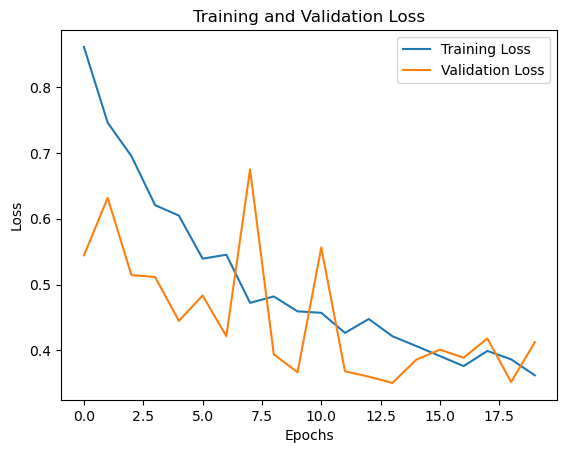

In [358]:
# using the following commands to plot the training and validation loss with Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

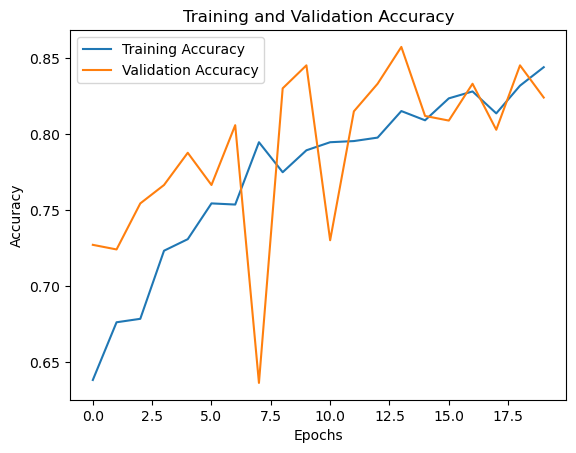

In [360]:
# plotting for training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [362]:
# use the trained model to predict the class labels for the images in the testing set
# Predict on the test set
predictions = model.predict(x_test)

# Apply a threshold to convert probabilities to binary class predictions
# for sigmoid activation, i use a threshold of 0.5
y_pred = (predictions > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


In [364]:
# Using classification report to determine if there is image class that is easier to predict than others and how accurately 
# does the model predict each label? 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       190
           1       0.94      0.63      0.75       140

    accuracy                           0.82       330
   macro avg       0.86      0.80      0.81       330
weighted avg       0.85      0.82      0.82       330



<Figure size 2000x3000 with 0 Axes>

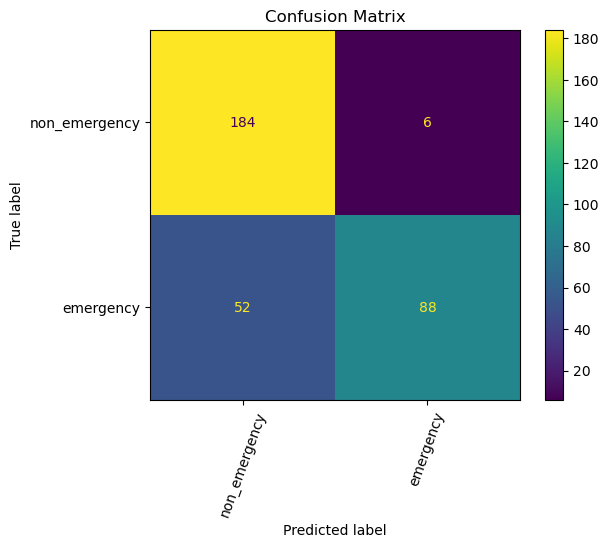

In [366]:
# create a plot of the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=class_names)
plt.title('Confusion Matrix')
plt.xticks(rotation = 70)
plt.show()